ensure the label elements are all having unique colors 31 31
ma shape (1024, 2048, 3) ulm_000040_000019_leftImg8bit.png ulm_000040_000019_gtFine_color.png
image saved to  /workspace/hiRes_Unet/8data/img/ulm_000040_000019_leftImg8bit.png
mask saved to  /workspace/hiRes_Unet/8data/gt/ulm_000040_000019_gtFine_color.png


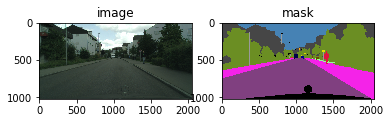

ma shape (1024, 2048, 3) ulm_000043_000019_leftImg8bit.png ulm_000043_000019_gtFine_color.png


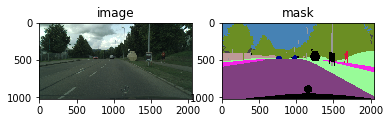

ma shape (1024, 2048, 3) ulm_000059_000019_leftImg8bit.png ulm_000059_000019_gtFine_color.png


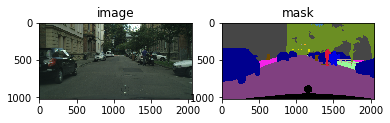

ma shape (1024, 2048, 3) ulm_000063_000019_leftImg8bit.png ulm_000063_000019_gtFine_color.png


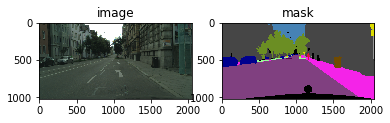

ma shape (1024, 2048, 3) ulm_000082_000019_leftImg8bit.png ulm_000082_000019_gtFine_color.png


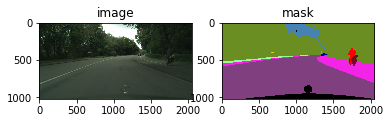

ma shape (1024, 2048, 3) ulm_000056_000019_leftImg8bit.png ulm_000056_000019_gtFine_color.png


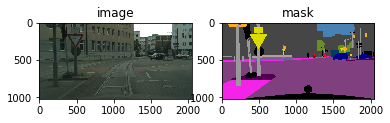

ma shape (1024, 2048, 3) ulm_000075_000019_leftImg8bit.png ulm_000075_000019_gtFine_color.png


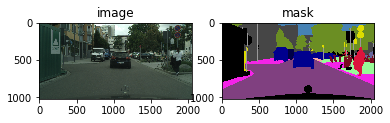

ma shape (1024, 2048, 3) ulm_000057_000019_leftImg8bit.png ulm_000057_000019_gtFine_color.png


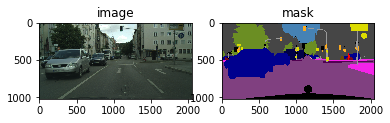

ma shape (1024, 2048, 3) ulm_000015_000019_leftImg8bit.png ulm_000015_000019_gtFine_color.png


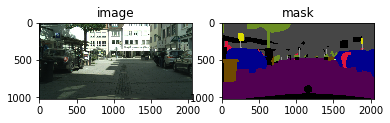

ma shape (1024, 2048, 3) ulm_000091_000019_leftImg8bit.png ulm_000091_000019_gtFine_color.png


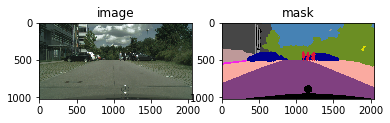

ma shape (1024, 2048, 3) ulm_000084_000019_leftImg8bit.png ulm_000084_000019_gtFine_color.png


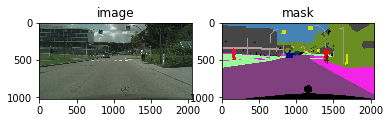

ma shape (1024, 2048, 3) ulm_000020_000019_leftImg8bit.png ulm_000020_000019_gtFine_color.png
ma shape (1024, 2048, 3) ulm_000002_000019_leftImg8bit.png ulm_000002_000019_gtFine_color.png
ma shape (1024, 2048, 3) ulm_000038_000019_leftImg8bit.png ulm_000038_000019_gtFine_color.png
ma shape (1024, 2048, 3) ulm_000092_000019_leftImg8bit.png ulm_000092_000019_gtFine_color.png
ma shape (1024, 2048, 3) ulm_000030_000019_leftImg8bit.png ulm_000030_000019_gtFine_color.png
ma shape (1024, 2048, 3) ulm_000041_000019_leftImg8bit.png ulm_000041_000019_gtFine_color.png
ma shape (1024, 2048, 3) ulm_000085_000019_leftImg8bit.png ulm_000085_000019_gtFine_color.png
ma shape (1024, 2048, 3) ulm_000048_000019_leftImg8bit.png ulm_000048_000019_gtFine_color.png
ma shape (1024, 2048, 3) ulm_000079_000019_leftImg8bit.png ulm_000079_000019_gtFine_color.png
ma shape (1024, 2048, 3) ulm_000065_000019_leftImg8bit.png ulm_000065_000019_gtFine_color.png
ma shape (1024, 2048, 3) ulm_000071_000019_leftImg8bit.png u

In [3]:
import os 
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

imP='./raw/leftImg8bit/train/'
maP='./raw/gtFine/train/'
imO='/workspace/hiRes_Unet/8data/img/'
maO='/workspace/hiRes_Unet/8data/gt/'
#imO='/workspace/ssUnet/test_data/images/'
#maO='/workspace/ssUnet/test_data/masks/'

len(os.listdir(imP)), len(os.listdir(maP))
cities=os.listdir(imP)

labels = [
    (  'unlabeled'        , (0,  0,  0) ),
    (  'dynamic'          , (111, 74,  0) ),
    (  'ground'           , ( 81,  0, 81) ),
    (  'road'            , (128, 64,128) ),
    (  'sidewalk'           , (244, 35,232) ),
    (  'parking'            , (250,170,160) ),
    (  'rail track'             , (230,150,140) ),
    (  'building'              , ( 70, 70, 70) ),
    (  'wall'              , (102,102,156) ),
    (  'fence'                  , (190,153,153) ),
    (  'guard rail'               , (180,165,180) ),
    (  'bridge'                  , (150,100,100) ),
    (  'tunnel'                 , (150,120, 90) ),
    (  'pole'                       , (153,153,153) ),
    (  'polegroup'           , (153,153,153) ),
    (  'traffic light'         , (250,170, 30) ),
    (  'traffic sign'          , (220,220,  0) ),
    (  'vegetation'           , (107,142, 35) ),
    (  'terrain'               , (152,251,152) ),
    (  'sky'                   , ( 70,130,180) ),
    (  'person'               , (220, 20, 60) ),
    (  'rider'                  , (255,  0,  0) ),
    (  'car'                     , (  0,  0,142) ),
    (  'truck'                  , (  0,  0, 70) ),
    (  'bus'                   , (  0, 60,100) ),
    (  'caravan'               , (  0,  0, 90) ),
    (  'trailer'                    , (  0,  0,110) ),
    (  'train'                     , (  0, 80,100) ),
    (  'motorcycle'              , (  0,  0,230) ),
    (  'bicycle'                   , (119, 11, 32) ),
    (  'license plate'            , (  0,  0,142) )]
print("ensure the label elements are all having unique colors",len(set(labels)), len(labels))

def get_labels(mask,label_name,label_color):
    tp=np.all(mask==label_color,axis=-1)
    if tp.sum()>0:
        return label_name, tp*1.
    else:
        return label_name, np.zeros(shape=(1024,2048),dtype=np.float)
show=3
i=0
show_labels=False
visualize=True
X=[]
Y=[]

""" # move the data to 8data 
for city in cities :
    imsub=imP+city+'/'
    masub=maP+city+'/'
    im_ls=os.listdir(imsub)
    ma_ls=os.listdir(masub)
    for im_name in im_ls:
        keys=im_name.split('.')[0].split('_')[:3]
        #mask_name='_'.join(keys)+'_gtFine_labelIds'+'.png'
        mask_name='_'.join(keys)+'_gtFine_color'+'.png'
        #print(keys,mask_name)
        if os.path.exists(masub+mask_name) :
            im=cv2.imread(imsub+im_name)
            ma=cv2.imread(masub+mask_name)
            print("ma shape",ma.shape, im_name, mask_name)
            if i % 500 == 0 :
                print("image saved to ", imO+im_name)
                print("mask saved to ", maO+mask_name)
            cv2.imwrite(imO+im_name,im)
            #cv2.imwrite(maO+mask_name,ma)
            cv2.imwrite(maO+mask_name,ma)
            masks=[]
            if show_labels:
                for (a,b) in labels:
                    lbn,arr=get_labels(ma,a,b)
                    masks.append(arr)
                masks=np.array(masks).reshape(1024,2048,len(labels))
                #print(masks.shape)
            #print(im.shape,ma.shape)
            if visualize and i<=10 :
                plt.subplot(1,2,1)
                plt.imshow(im[:,:,[2,1,0]])
                plt.title("image")
                plt.subplot(1,2,2)
                plt.imshow(ma[:,:,[2,1,0]])#,cmap='gray', vmin=0, vmax=255)
                plt.title("mask")
                plt.show()
            i+=1
            #X.append(im)
            #Y.append(masks)
        elif i>=100:
            pass
        else:
            pass
#X=np.array(X)
#Y=np.array(Y)

#X.shape, Y.shape
"""

In [14]:
import os
import numpy as np
imO='/workspace/hiRes_Unet/8data/img/'
maO='/workspace/hiRes_Unet/8data/gt/'
im_ls=os.listdir(imO)
ma_ls=os.listdir(maO)

with open("img8.set", "w") as f1:
    with open("gt8.set", "w") as f2:
        for im_name in im_ls:
            keys=im_name.split('.')[0].split('_')[:3]
            mask_name='_'.join(keys)+'_gtFine_labelIds.png'#'_gtFine_color'+'.png'
            
            if os.path.exists(maO+mask_name):
                #print(im_name,mask_name)
                f1.write('%-1s %s\n' % (imO+im_name,str(1)))
                f2.write('%-1s %s\n' % (maO+mask_name,str(1)))    



In [15]:
!head img8.set        

/workspace/hiRes_Unet/8data/img/munich_000149_000019_leftImg8bit.png 1
/workspace/hiRes_Unet/8data/img/berlin_000315_000019_leftImg8bit.png 1
/workspace/hiRes_Unet/8data/img/munich_000315_000019_leftImg8bit.png 1
/workspace/hiRes_Unet/8data/img/munich_000282_000019_leftImg8bit.png 1
/workspace/hiRes_Unet/8data/img/berlin_000259_000019_leftImg8bit.png 1
/workspace/hiRes_Unet/8data/img/mainz_000001_041797_leftImg8bit.png 1
/workspace/hiRes_Unet/8data/img/bielefeld_000000_002308_leftImg8bit.png 1
/workspace/hiRes_Unet/8data/img/bielefeld_000000_025426_leftImg8bit.png 1
/workspace/hiRes_Unet/8data/img/mainz_000000_010171_leftImg8bit.png 1
/workspace/hiRes_Unet/8data/img/munich_000186_000019_leftImg8bit.png 1


In [11]:
!head gt8.set

/workspace/hiRes_Unet/8data/gt/munich_000149_000019_gtFine_labelIds.png 1
/workspace/hiRes_Unet/8data/gt/berlin_000315_000019_gtFine_labelIds.png 1
/workspace/hiRes_Unet/8data/gt/munich_000315_000019_gtFine_labelIds.png 1
/workspace/hiRes_Unet/8data/gt/munich_000282_000019_gtFine_labelIds.png 1
/workspace/hiRes_Unet/8data/gt/berlin_000259_000019_gtFine_labelIds.png 1
/workspace/hiRes_Unet/8data/gt/mainz_000001_041797_gtFine_labelIds.png 1
/workspace/hiRes_Unet/8data/gt/bielefeld_000000_002308_gtFine_labelIds.png 1
/workspace/hiRes_Unet/8data/gt/bielefeld_000000_025426_gtFine_labelIds.png 1
/workspace/hiRes_Unet/8data/gt/mainz_000000_010171_gtFine_labelIds.png 1
/workspace/hiRes_Unet/8data/gt/munich_000186_000019_gtFine_labelIds.png 1


In [ ]:
%load_ext tensorboard

In [53]:
from __future__ import print_function
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import numpy as np
import os
import cv2
import warnings

warnings.filterwarnings("ignore")

BackGround = [255, 255, 255]
road = [0, 0, 0]
# COLOR_DICT = np.array([BackGround, road])
one = [128, 128, 128]
two = [128, 0, 0]
three = [192, 192, 128]
four = [255, 69, 0]
five = [128, 64, 128]
six = [60, 40, 222]
seven = [128, 128, 0]
eight = [192, 128, 128]
nine = [64, 64, 128]
ten = [64, 0, 128]
eleven = [64, 64, 0]
twelve = [0, 128, 192]
COLOR_DICT = np.array([one, two,three,four,five,six,seven,eight,nine,ten,eleven,twelve])

train_path = "./data_road/training/"
image_folder = "./data_road/training/image_2/"
label_folder = "./data_road/training/gt_image_2/"
log_filepath = './log'
output_im = './pre/images/'
output_ma = './pre/masks/'
flag_multi_class = False
num_classes = 2
image_color_mode = "rgb"
label_color_mode = "rgb"
img_type = 'png'

def adjustData( img,img_name, outputim, label,label_name,outputma, num_class):
    h ,w  = 784,2048
    img = cv2.resize(img, (w, h), interpolation=cv2.INTER_NEAREST)
    label = cv2.resize(label, (w, h), interpolation=cv2.INTER_NEAREST)
    if flag_multi_class:        
        img = img / 255.
        label = label[:, :, :, 0] if (len(label.shape) == 4) else label[:, :, 0]
        new_label = np.zeros(label.shape + (num_class,))
        for i in range(num_class):
            new_label[label == i, i] = 1
        label = new_label
    elif (np.max(img) > 1):
        img = img / 255.
        label = label / 255.
        label[label > 0.5] = 1
        label[label <= 0.5] = 0
    
    img*=255.
    label*=255.
    print(img_name,img.shape,label_name,label.shape)
    cv2.imwrite(output_im + img_name ,img)
    cv2.imwrite(output_ma+label_name, label)
    return (img, label)

imgs_ls=os.listdir(image_folder)
mas_ls=os.listdir(label_folder)


for im_name in imgs_ls:
    im_keys=im_name.split('.')[0].split('_')
    road_key=im_keys[0]+'_road_'+im_keys[1]+'.png'
    lane_key=im_keys[0]+'_lane_'+im_keys[1]+'.png'
    if os.path.exists(label_folder+road_key):
        im=cv2.imread(image_folder+im_name)
        ma=cv2.imread(label_folder+road_key)
        #print(im.shape,ma.shape)
        im,ma=adjustData(im, im_name , output_im,ma,road_key, output_ma,2 )
    elif os.path.exists(label_folder+lane_key):
        im=cv2.imread(image_folder+im_name)
        ma=cv2.imread(label_folder+lane_key)
        #print(im.shape, ma.shape)
        im,ma=adjustData(im, im_name , output_im,ma,lane_key, output_ma,2 )
    else:
        print("please check annotated mask {}.{} and image{}, it does not have any corresponding image ".format(road_key,lane_key,im_name))
      


um_000057.png (784, 2048, 3) um_road_000057.png (784, 2048, 3)
uu_000064.png (784, 2048, 3) uu_road_000064.png (784, 2048, 3)
uu_000096.png (784, 2048, 3) uu_road_000096.png (784, 2048, 3)
umm_000007.png (784, 2048, 3) umm_road_000007.png (784, 2048, 3)
umm_000073.png (784, 2048, 3) umm_road_000073.png (784, 2048, 3)
uu_000059.png (784, 2048, 3) uu_road_000059.png (784, 2048, 3)
um_000043.png (784, 2048, 3) um_road_000043.png (784, 2048, 3)
umm_000065.png (784, 2048, 3) umm_road_000065.png (784, 2048, 3)
uu_000035.png (784, 2048, 3) uu_road_000035.png (784, 2048, 3)
umm_000086.png (784, 2048, 3) umm_road_000086.png (784, 2048, 3)
umm_000057.png (784, 2048, 3) umm_road_000057.png (784, 2048, 3)
um_000074.png (784, 2048, 3) um_road_000074.png (784, 2048, 3)
umm_000076.png (784, 2048, 3) umm_road_000076.png (784, 2048, 3)
um_000039.png (784, 2048, 3) um_road_000039.png (784, 2048, 3)
uu_000028.png (784, 2048, 3) uu_road_000028.png (784, 2048, 3)
uu_000012.png (784, 2048, 3) uu_road_000012